# LGMVIP Task 2 
# **Exploratory Data Analysis on Dataset- Terrorism ** 
## April Batch
## Name- Sumaiya Mustafa Mulani

# Importing libraries required for analysis

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import seaborn as sns 

# Importing data

In [ ]:
data = pd.read_csv(r'globalterrorismdb_0718dist.csv', encoding = "latin1")
df = pd.DataFrame(data)
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [ ]:
df.shape

(181691, 135)

In [ ]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [ ]:
for i in df.columns:
  print(i,", ")

eventid , 
iyear , 
imonth , 
iday , 
approxdate , 
extended , 
resolution , 
country , 
country_txt , 
region , 
region_txt , 
provstate , 
city , 
latitude , 
longitude , 
specificity , 
vicinity , 
location , 
summary , 
crit1 , 
crit2 , 
crit3 , 
doubtterr , 
alternative , 
alternative_txt , 
multiple , 
success , 
suicide , 
attacktype1 , 
attacktype1_txt , 
attacktype2 , 
attacktype2_txt , 
attacktype3 , 
attacktype3_txt , 
targtype1 , 
targtype1_txt , 
targsubtype1 , 
targsubtype1_txt , 
corp1 , 
target1 , 
natlty1 , 
natlty1_txt , 
targtype2 , 
targtype2_txt , 
targsubtype2 , 
targsubtype2_txt , 
corp2 , 
target2 , 
natlty2 , 
natlty2_txt , 
targtype3 , 
targtype3_txt , 
targsubtype3 , 
targsubtype3_txt , 
corp3 , 
target3 , 
natlty3 , 
natlty3_txt , 
gname , 
gsubname , 
gname2 , 
gsubname2 , 
gname3 , 
gsubname3 , 
motive , 
guncertain1 , 
guncertain2 , 
guncertain3 , 
individual , 
nperps , 
nperpcap , 
claimed , 
claimmode , 
claimmode_txt , 
claim2 , 
claimmode2 , 
claimmo

# Cleaning the data

In [ ]:
df = df[["iyear", "imonth", "iday", "country_txt", "region_txt", "provstate", "city", "latitude", "longitude", "location", "summary", "attacktype1_txt", "targtype1_txt", "gname", "motive", "weaptype1_txt", "nkill", "nwound", "addnotes"]]
df.head()

,iyear,imonth,iday,country_txt,region_txt,provstate,city,latitude,longitude,location,summary,attacktype1_txt,targtype1_txt,gname,motive,weaptype1_txt,nkill,nwound,addnotes
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,NaN,NaN,Assassination,Private Citizens & Property,MANO-D,NaN,Unknown,1.0,0.0,NaN
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,NaN,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,NaN,Unknown,0.0,0.0,NaN
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,NaN,NaN,Assassination,Journalists & Media,Unknown,NaN,Unknown,1.0,0.0,NaN
3,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,NaN,NaN,Bombing/Explosion,Government (Diplomatic),Unknown,NaN,Explosives,NaN,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,NaN,NaN,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,NaN,Incendiary,NaN,NaN,NaN


In [ ]:
df.rename(columns={"iyear":"Year", "imonth":"Month", "iday":"Day", "country_txt":"Country", "region_txt":"Region", "provstate":"Province/State", "city":"City", "latitude":"Latitude", "longitude":"Longitude", "location":"Location", "summary":"Summary", "attacktype1_txt":"Attack Type", "targtype1_txt":"Target Type", "gname":"Group Name", "motive":"Motive", "weaptype1_txt":"Weapon Type", "nkill":"Killed", "nwound":"Wounded", "addnotes":"Add Notes"},inplace=True) 


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df.head()

,Year,Month,Day,Country,Region,Province/State,City,Latitude,Longitude,Location,Summary,Attack Type,Target Type,Group Name,Motive,Weapon Type,Killed,Wounded,Add Notes
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,NaN,NaN,Assassination,Private Citizens & Property,MANO-D,NaN,Unknown,1.0,0.0,NaN
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,NaN,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,NaN,Unknown,0.0,0.0,NaN
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,NaN,NaN,Assassination,Journalists & Media,Unknown,NaN,Unknown,1.0,0.0,NaN
3,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,NaN,NaN,Bombing/Explosion,Government (Diplomatic),Unknown,NaN,Explosives,NaN,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,NaN,NaN,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,NaN,Incendiary,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Year            181691 non-null  int64  
 1   Month           181691 non-null  int64  
 2   Day             181691 non-null  int64  
 3   Country         181691 non-null  object 
 4   Region          181691 non-null  object 
 5   Province/State  181270 non-null  object 
 6   City            181257 non-null  object 
 7   Latitude        177135 non-null  float64
 8   Longitude       177134 non-null  float64
 9   Location        55495 non-null   object 
 10  Summary         115562 non-null  object 
 11  Attack Type     181691 non-null  object 
 12  Target Type     181691 non-null  object 
 13  Group Name      181691 non-null  object 
 14  Motive          50561 non-null   object 
 15  Weapon Type     181691 non-null  object 
 16  Killed          171378 non-null  float64
 17  Wounded   

In [ ]:
df.shape

(181691, 19)

In [ ]:
df.isnull().sum()

Year                   0
Month                  0
Day                    0
Country                0
Region                 0
Province/State       421
City                 434
Latitude            4556
Longitude           4557
Location          126196
Summary            66129
Attack Type            0
Target Type            0
Group Name             0
Motive            131130
Weapon Type            0
Killed             10313
Wounded            16311
Add Notes         153402
dtype: int64

In [ ]:
df["Killed"]=df["Killed"].fillna(0)
df["Wounded"]=df["Wounded"].fillna(0)
df["Casualty"]=df["Killed"]+df["Wounded"]

In [ ]:
df.describe()

,Year,Month,Day,Latitude,Longitude,Killed,Wounded,Casualty
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181691.000000,181691.000000,181691.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.266860,2.883296,5.150156
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.227057,34.309747,40.555416
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000,1.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000,4.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000,9574.000000


**Observaion**
1. The data consists of terrorist activities ranging from the year: 1970 to 2017
2. Maximum number of people killed in an event were: 1570
3. Maximum no. of people wounded in an event were: 8191
4. Maximum number of total casualties were: 9574


# Visualizing the data
**1. Year wise Attacks**

1.Number of Attacks in each year


In [ ]:
attacks = df["Year"].value_counts(dropna=False).sort_index().to_frame().reset_index().rename(columns={"index":"Year", "Year":"Attacks"}).set_index("Year")

In [ ]:
attacks.head()

,Attacks
Year,
1970,651
1971,471
1972,568
1973,473
1974,581


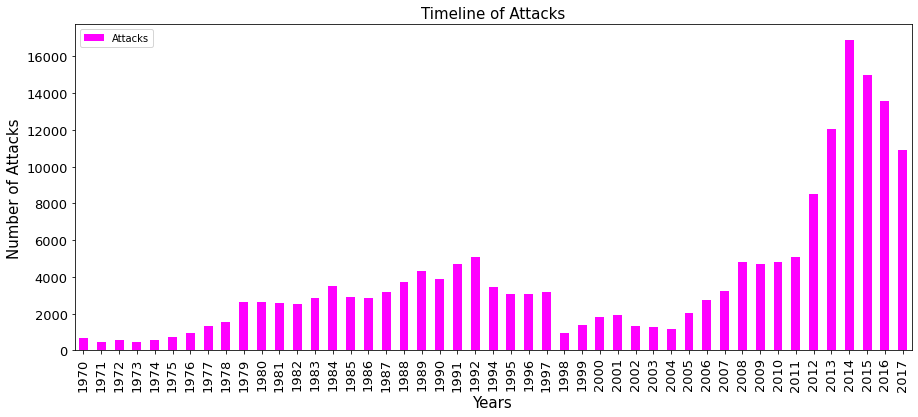

In [ ]:
attacks.plot(kind="bar", color="magenta", figsize=(15,6), fontsize=13)
plt.title("Timeline of Attacks", fontsize = 15) 
plt.xlabel("Years", fontsize=15)
plt.ylabel("Number of Attacks", fontsize=15)
plt.show()

## 2.Total Casualities(Killed+Wounded) in each year

In [ ]:
yc=df[["Year", "Casualty"]].groupby("Year").sum()
yc.head()

,Casualty
Year,
1970,386.0
1971,255.0
1972,975.0
1973,865.0
1974,1404.0


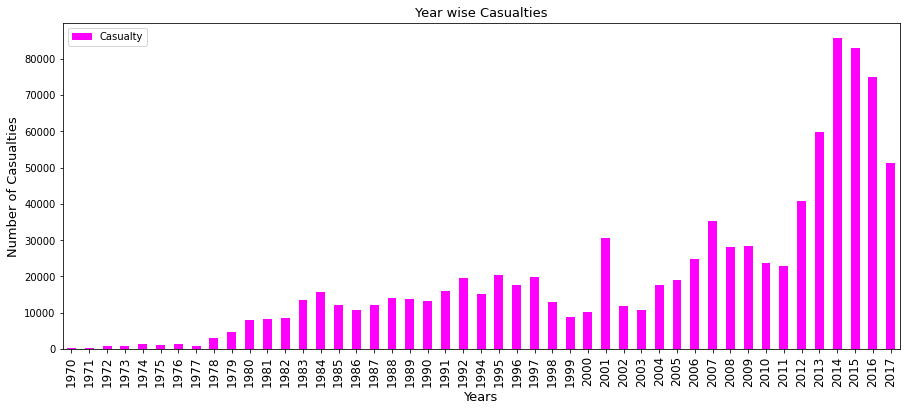

In [ ]:
yc.plot(kind="bar", color="magenta", figsize=(15,6))
plt.title("Year wise Casualties", fontsize=13)
plt.xlabel("Years", fontsize=13) 
plt.xticks(fontsize=12)
plt.ylabel("Number of Casualties", fontsize=13)
plt.show()

## 3. Killed in each year

In [ ]:
yk=df[["Year", "Killed"]].groupby("Year").sum()
yk.head()

,Killed
Year,
1970,174.0
1971,173.0
1972,566.0
1973,370.0
1974,539.0


## 4. Wounded in each region

In [ ]:
yw=df[["Year", "Wounded"]].groupby("Year").sum()
yw.head()

,Wounded
Year,
1970,212.0
1971,82.0
1972,409.0
1973,495.0
1974,865.0


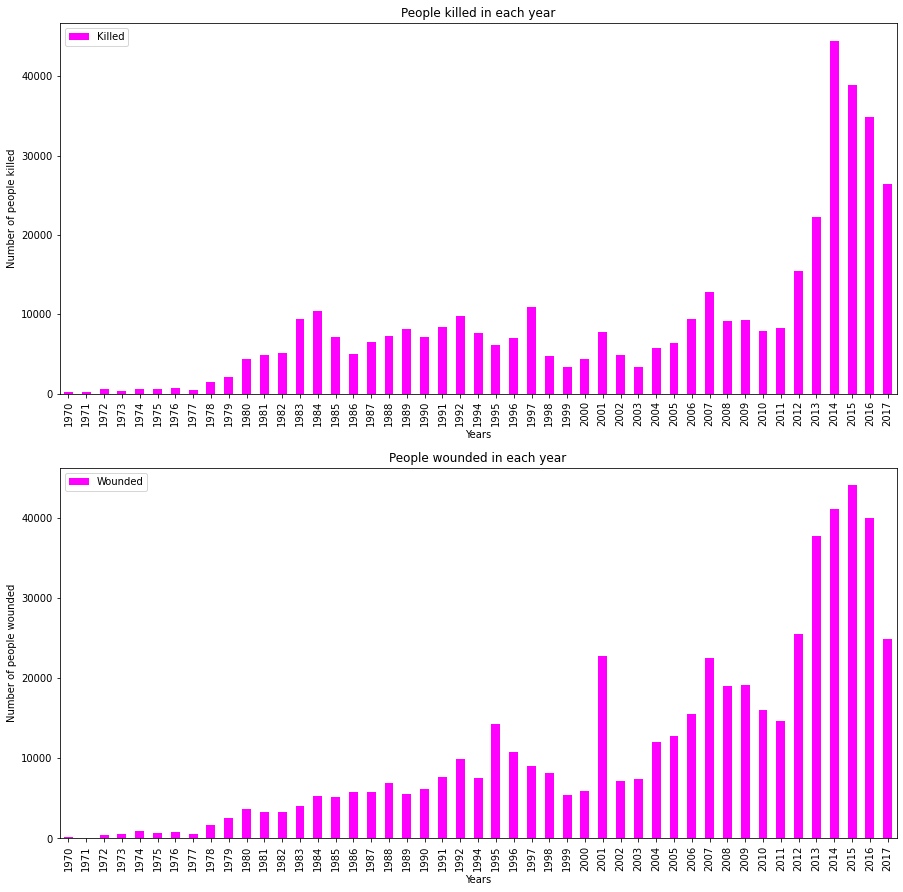

In [ ]:
fig=plt.figure()
ax0=fig.add_subplot(2,1,1)
ax1=fig.add_subplot(2,1,2)

#Killed
yk.plot(kind="bar", color="magenta", figsize=(15,15),ax=ax0)
ax0.set_title("People killed in each year")
ax0.set_xlabel("Years")
ax0.set_ylabel("Number of people killed")

#Wounded
yw.plot(kind="bar", color="magenta", figsize=(15,15),ax=ax1)
ax1.set_title("People wounded in each year")
ax1.set_xlabel("Years")
ax1.set_ylabel("Number of people wounded")

plt.show()

# 2. Region Wise Attacks 


1.Distribution of Terrorist Attacks over Regions from 1970-2017

In [ ]:
reg=pd.crosstab(df.Year,df.Region)
reg.head()

Region,Australasia & Oceania,Central America & Caribbean,Central Asia,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
Year,,,,,,,,,,,,
1970,1,7,0,2,12,28,472,65,1,10,3,50
1971,1,5,0,1,5,55,247,24,0,6,2,125
1972,8,3,0,0,1,53,73,33,1,16,4,376
1973,1,6,0,2,1,19,64,83,1,2,4,290
1974,1,11,0,4,2,42,111,81,2,3,7,317


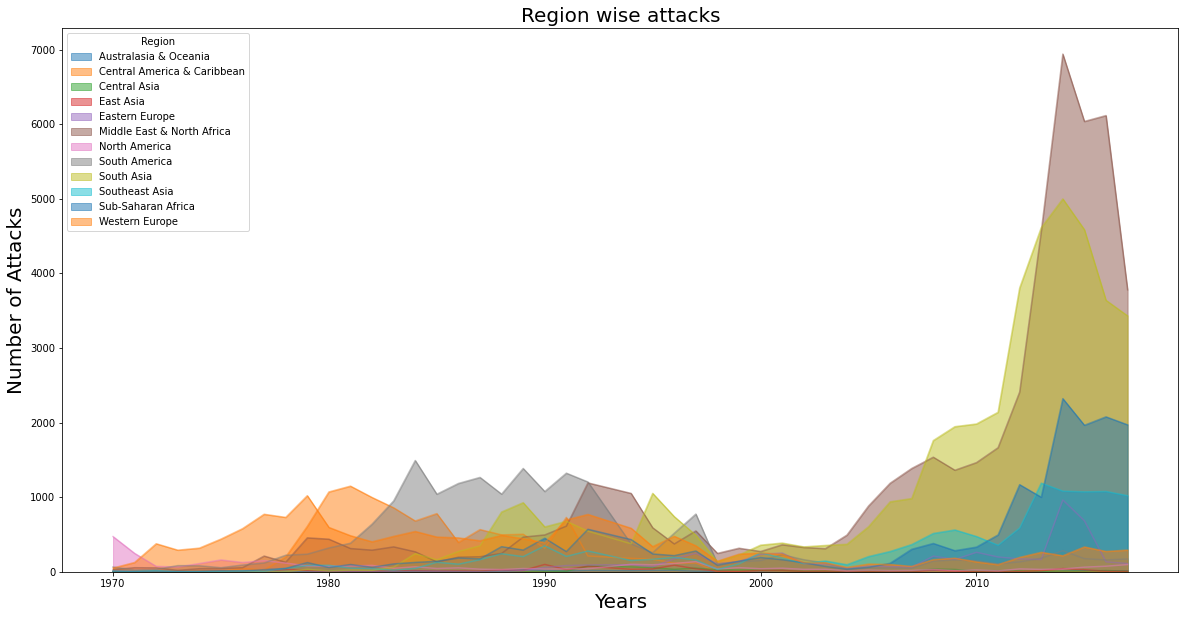

In [ ]:
reg.plot(kind="area", stacked=False, alpha=0.5, figsize=(20,10))
plt.title("Region wise attacks", fontsize=20)
plt.xlabel("Years", fontsize=20)
plt.ylabel("Number of Attacks", fontsize=20)
plt.show()

2.Total Terrorist Attacks in each Region from 1970-2017

In [ ]:
regt=reg.transpose()
regt["Total"]=regt.sum(axis=1)
ra=regt["Total"].sort_values(ascending=False)
ra

Region
Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: Total, dtype: int64

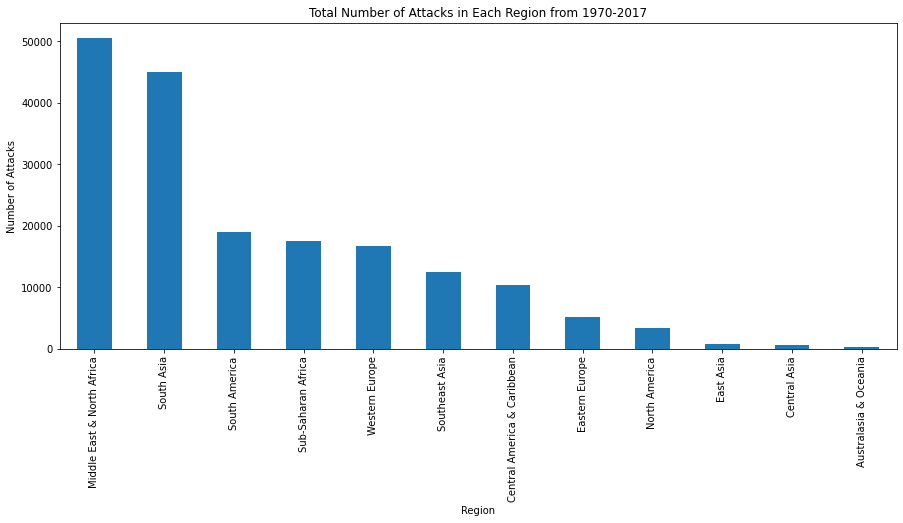

In [ ]:
ra.plot(kind="bar", figsize=(15,6))
plt.title("Total Number of Attacks in Each Region from 1970-2017")
plt.xlabel("Region")
plt.ylabel("Number of Attacks")
plt.show()

3.Total Casualties (Killed + Wounded) in each Region

In [ ]:
rc=df[["Region", "Casualty"]].groupby("Region").sum().sort_values(by="Casualty", ascending=False)
rc

,Casualty
Region,
Middle East & North Africa,351950.0
South Asia,242679.0
Sub-Saharan Africa,131243.0
South America,45553.0
Southeast Asia,41896.0
Central America & Caribbean,37699.0
North America,26447.0
Western Europe,25026.0
Eastern Europe,19460.0


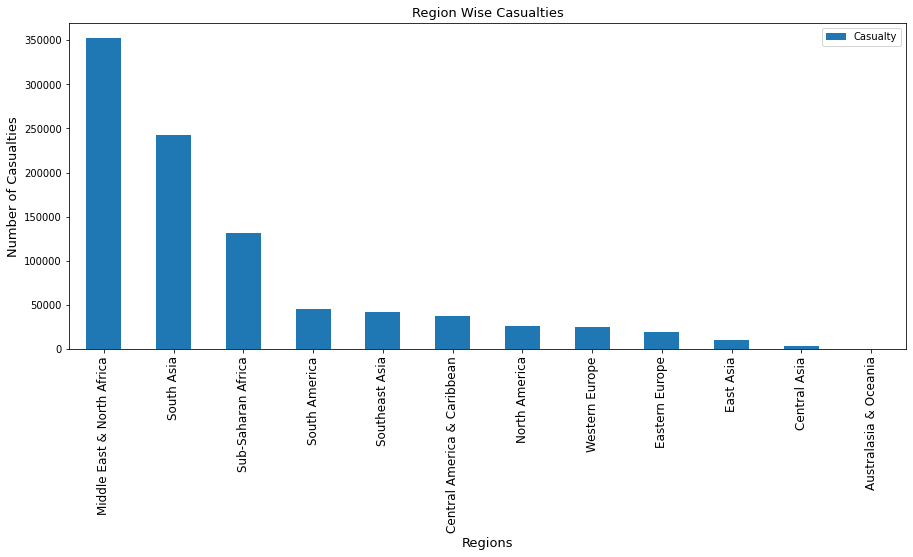

In [ ]:
rc.plot(kind="bar", figsize=(15,6))
plt.title("Region Wise Casualties", fontsize=13)
plt.xlabel("Regions", fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Casualties", fontsize=13)
plt.show()

4.Killed in each region

In [ ]:
rk=df[["Region", "Killed"]].groupby("Region").sum().sort_values(by="Killed", ascending=False)
rk

,Killed
Region,
Middle East & North Africa,137642.0
South Asia,101319.0
Sub-Saharan Africa,78386.0
South America,28849.0
Central America & Caribbean,28708.0
Southeast Asia,15637.0
Eastern Europe,7415.0
Western Europe,6694.0
North America,4916.0


5.Wounded in each region

In [ ]:
rw=df[["Region", "Wounded"]].groupby("Region").sum().sort_values(by="Wounded", ascending=False)
rw

,Wounded
Region,
Middle East & North Africa,214308.0
South Asia,141360.0
Sub-Saharan Africa,52857.0
Southeast Asia,26259.0
North America,21531.0
Western Europe,18332.0
South America,16704.0
Eastern Europe,12045.0
East Asia,9213.0


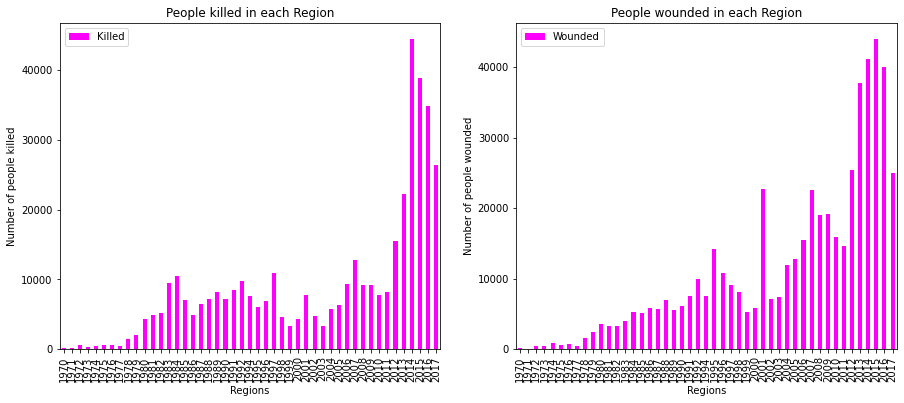

In [ ]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

#Killed
yk.plot(kind="bar", color="magenta", figsize=(15,6),ax=ax0)
ax0.set_title("People killed in each Region")
ax0.set_xlabel("Regions")
ax0.set_ylabel("Number of people killed")

#Wounded
yw.plot(kind="bar", color="magenta", figsize=(15,6),ax=ax1)
ax1.set_title("People wounded in each Region")
ax1.set_xlabel("Regions")
ax1.set_ylabel("Number of people wounded")

plt.show()

# 3.Country wise Attacks - Top 10

1.Number of Attacks in each country

In [ ]:
ct=df["Country"].value_counts().head(10)
ct

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: Country, dtype: int64

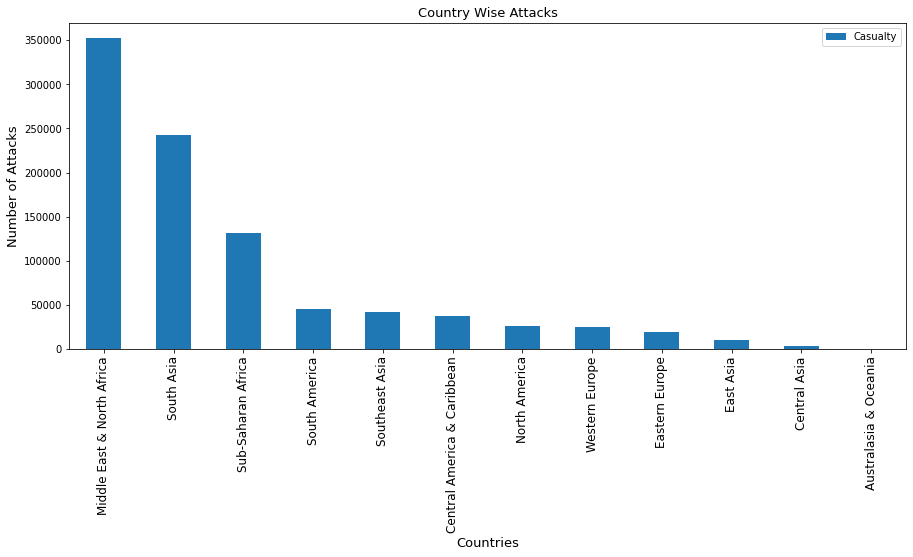

In [ ]:
rc.plot(kind="bar", figsize=(15,6))
plt.title("Country Wise Attacks", fontsize=13)
plt.xlabel("Countries", fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Attacks", fontsize=13)
plt.show()

2.Total Casualties(Killed+Wounded) in each Country

In [ ]:
cnc=df[["Country", "Casualty"]].groupby("Country").sum().sort_values(by="Casualty", ascending=False)
cnc.head(10)

,Casualty
Country,
Iraq,213279.0
Afghanistan,83661.0
Pakistan,65860.0
India,48321.0
Nigeria,32921.0
Sri Lanka,31091.0
Syria,29338.0
Colombia,25026.0
United States,24473.0


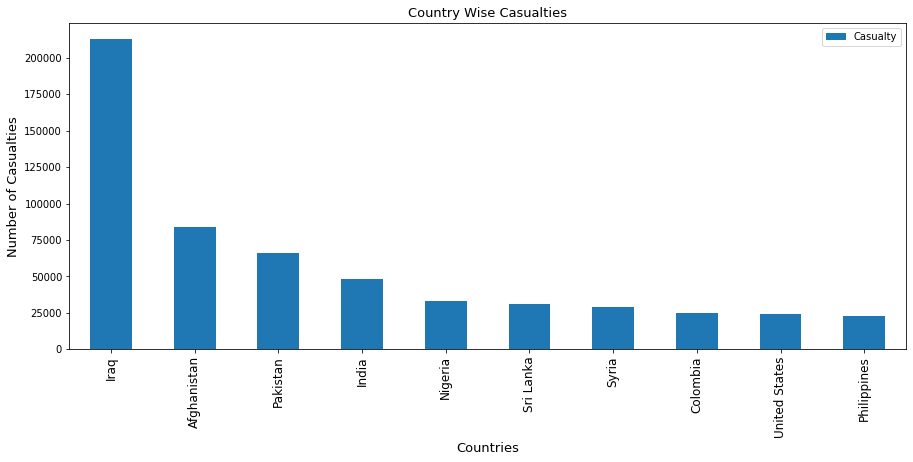

In [ ]:
cnc[:10].plot(kind="bar", figsize=(15,6))
plt.title("Country Wise Casualties", fontsize=13)
plt.xlabel("Countries", fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Casualties", fontsize=13)
plt.show()

3.Killed in each Country

In [ ]:
cnk=df[["Country", "Killed"]].groupby("Country").sum().sort_values(by="Killed", ascending=False)
cnk.head(10)

,Killed
Country,
Iraq,78589.0
Afghanistan,39384.0
Pakistan,23822.0
Nigeria,22682.0
India,19341.0
Sri Lanka,15530.0
Syria,15229.0
Colombia,14698.0
Peru,12771.0


In [ ]:
cnw=df[["Country", "Wounded"]].groupby("Country").sum().sort_values(by="Wounded", ascending=False)
cnw.head(10)

,Wounded
Country,
Iraq,134690.0
Afghanistan,44277.0
Pakistan,42038.0
India,28980.0
United States,20702.0
Sri Lanka,15561.0
Syria,14109.0
Philippines,13367.0
Lebanon,10904.0


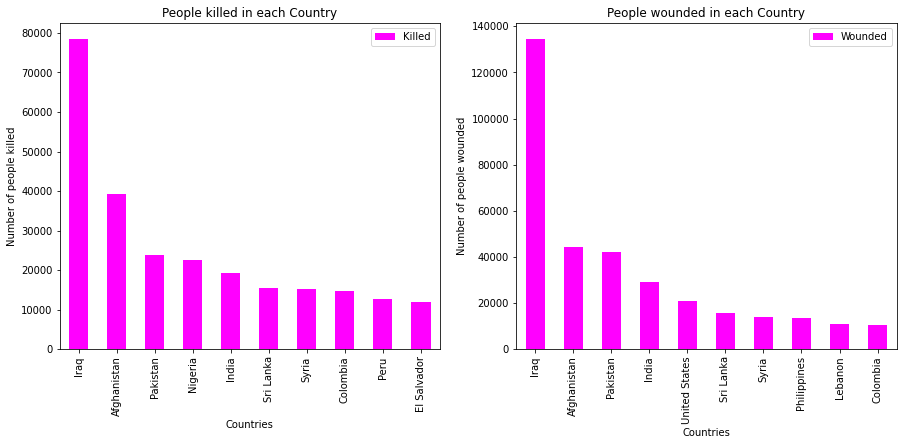

In [ ]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

#Killed
cnk[:10].plot(kind="bar", color="magenta", figsize=(15,6),ax=ax0)
ax0.set_title("People killed in each Country")
ax0.set_xlabel("Countries")
ax0.set_ylabel("Number of people killed")

#Wounded
cnw[:10].plot(kind="bar", color="magenta", figsize=(15,6),ax=ax1)
ax1.set_title("People wounded in each Country")
ax1.set_xlabel("Countries")
ax1.set_ylabel("Number of people wounded")

plt.show()

# 4.City wise Attacks

1.Number of Attacks in each city

In [ ]:
city=df["City"].value_counts()[1:11]
city

Baghdad         7589
Karachi         2652
Lima            2359
Mosul           2265
Belfast         2171
Santiago        1621
Mogadishu       1581
San Salvador    1558
Istanbul        1048
Athens          1019
Name: City, dtype: int64

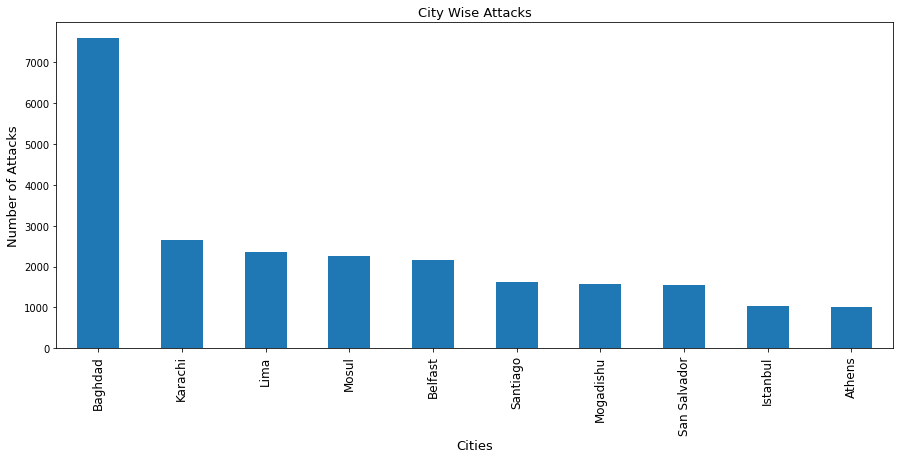

In [ ]:
city.plot(kind="bar", figsize=(15,6))
plt.title("City Wise Attacks", fontsize=13)
plt.xlabel("Cities", fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Attacks", fontsize=13)
plt.show()

2.Total Casualties (Killed + Wounded) in each city

In [ ]:
cc=df[["City", "Casualty"]].groupby("City").sum().sort_values(by="Casualty", ascending=False).drop("Unknown")
cc.head(10)

,Casualty
City,
Baghdad,77876.0
New York City,19619.0
Mosul,12927.0
Karachi,9376.0
Mogadishu,8868.0
Kabul,8466.0
Beirut,7257.0
Kirkuk,6636.0
Colombo,5906.0


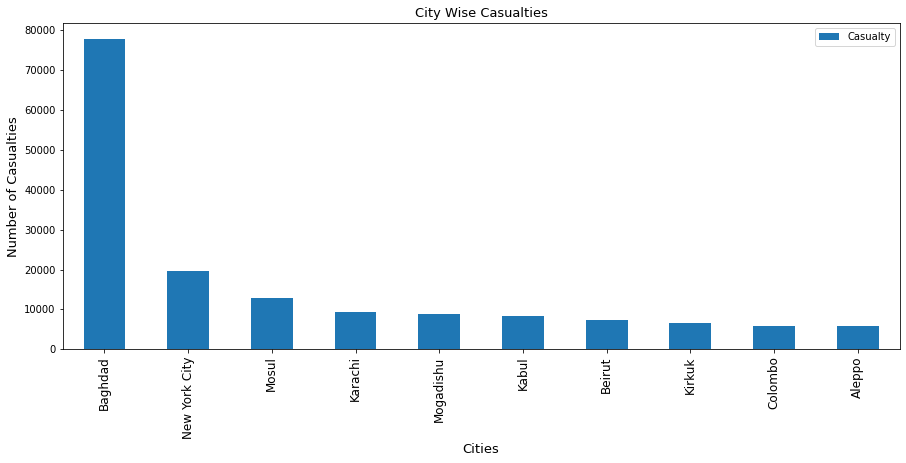

In [ ]:
cc[:10].plot(kind="bar", figsize=(15,6))
plt.title("City Wise Casualties", fontsize=13)
plt.xlabel("Cities", fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Casualties", fontsize=13)
plt.show()

3.Killed in each city

In [ ]:
ck=df[["City", "Killed"]].groupby("City").sum().sort_values(by="Killed",ascending=False).drop("Unknown")
ck.head(10)

,Killed
City,
Baghdad,21151.0
Mosul,7140.0
Mogadishu,3913.0
Karachi,3688.0
New York City,2838.0
Tikrit,2679.0
Kabul,2493.0
Ramadi,2313.0
Maiduguri,2235.0


4.Wounded in each city

In [ ]:
cw=df[["City", "Wounded"]].groupby("City").sum().sort_values(by="Wounded",ascending=False).drop("Unknown")
cw.head(10)

,Wounded
City,
Baghdad,56725.0
New York City,16781.0
Kabul,5973.0
Mosul,5787.0
Karachi,5688.0
Tokyo,5542.0
Beirut,5341.0
Nairobi,5024.0
Kirkuk,5008.0


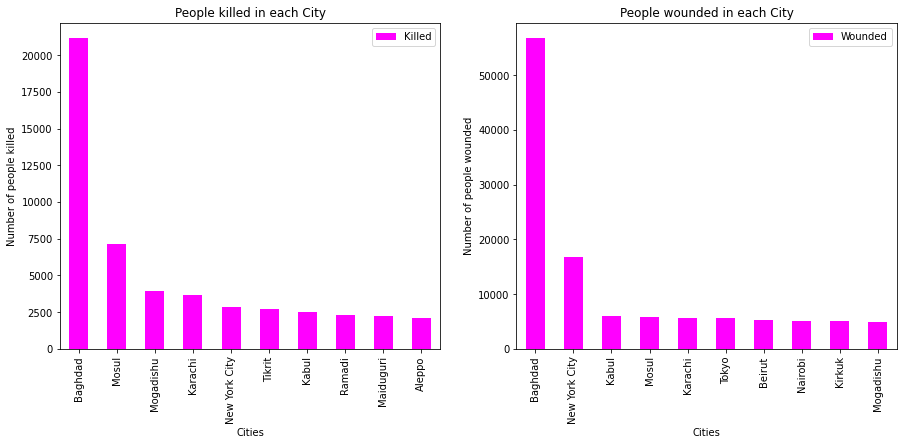

In [ ]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

#Killed
ck[:10].plot(kind="bar", color="magenta", figsize=(15,6),ax=ax0)
ax0.set_title("People killed in each City")
ax0.set_xlabel("Cities")
ax0.set_ylabel("Number of people killed")

#Wounded
cw[:10].plot(kind="bar", color="magenta", figsize=(15,6),ax=ax1)
ax1.set_title("People wounded in each City")
ax1.set_xlabel("Cities")
ax1.set_ylabel("Number of people wounded")

plt.show()

# 5.Terrorist Group wise Attacks- Top 10

1.Number of Attacks by each group 


In [ ]:
grp=df["Group Name"].value_counts()[1:11]
grp

Taliban                                             7478
Islamic State of Iraq and the Levant (ISIL)         5613
Shining Path (SL)                                   4555
Farabundo Marti National Liberation Front (FMLN)    3351
Al-Shabaab                                          3288
New People's Army (NPA)                             2772
Irish Republican Army (IRA)                         2671
Revolutionary Armed Forces of Colombia (FARC)       2487
Boko Haram                                          2418
Kurdistan Workers' Party (PKK)                      2310
Name: Group Name, dtype: int64

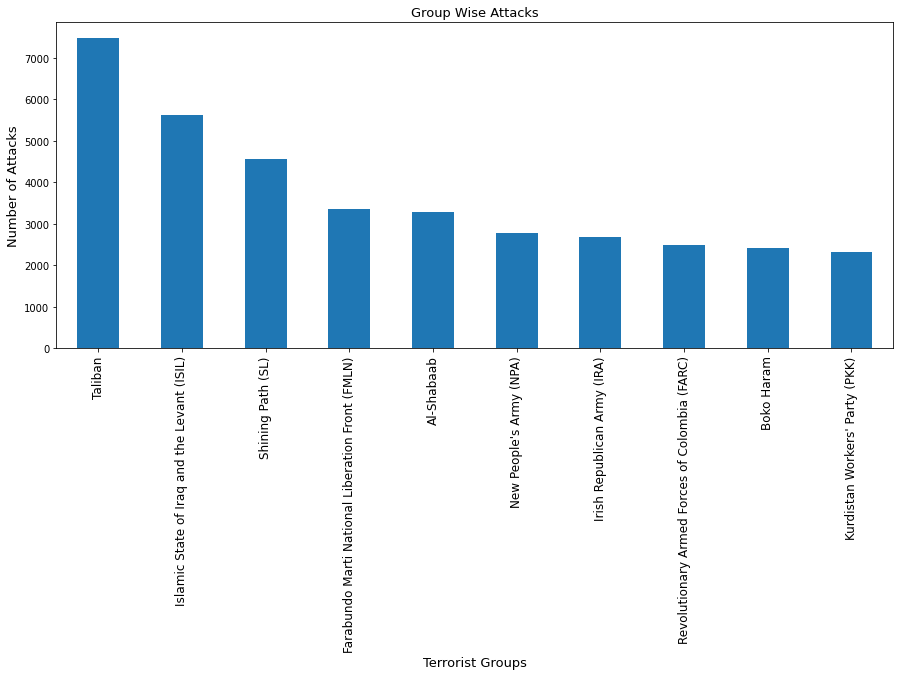

In [ ]:
grp.plot(kind="bar", figsize=(15,6))
plt.title("Group Wise Attacks", fontsize=13)
plt.xlabel("Terrorist Groups", fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Attacks", fontsize=13)
plt.show()

3.Killed by each group 

In [ ]:
gk=df[["Group Name", "Killed"]].groupby("Group Name").sum().sort_values(by="Killed",ascending=False).drop("Unknown")
gk.head(10)

,Killed
Group Name,
Islamic State of Iraq and the Levant (ISIL),38923.0
Taliban,29410.0
Boko Haram,20328.0
Shining Path (SL),11601.0
Liberation Tigers of Tamil Eelam (LTTE),10989.0
Al-Shabaab,9330.0
Farabundo Marti National Liberation Front (FMLN),8065.0
Nicaraguan Democratic Force (FDN),6662.0
Tehrik-i-Taliban Pakistan (TTP),6042.0


In [ ]:
gw=df[["Group Name", "Wounded"]].groupby("Group Name").sum().sort_values(by="Wounded",ascending=False).drop("Unknown")
gw.head(10)

,Wounded
Group Name,
Islamic State of Iraq and the Levant (ISIL),30672.0
Taliban,27932.0
Al-Qaida,24512.0
Liberation Tigers of Tamil Eelam (LTTE),11031.0
Al-Qaida in Iraq,10343.0
Tehrik-i-Taliban Pakistan (TTP),9532.0
Boko Haram,9473.0
Al-Shabaab,7624.0
Aum Shinri Kyo,6003.0


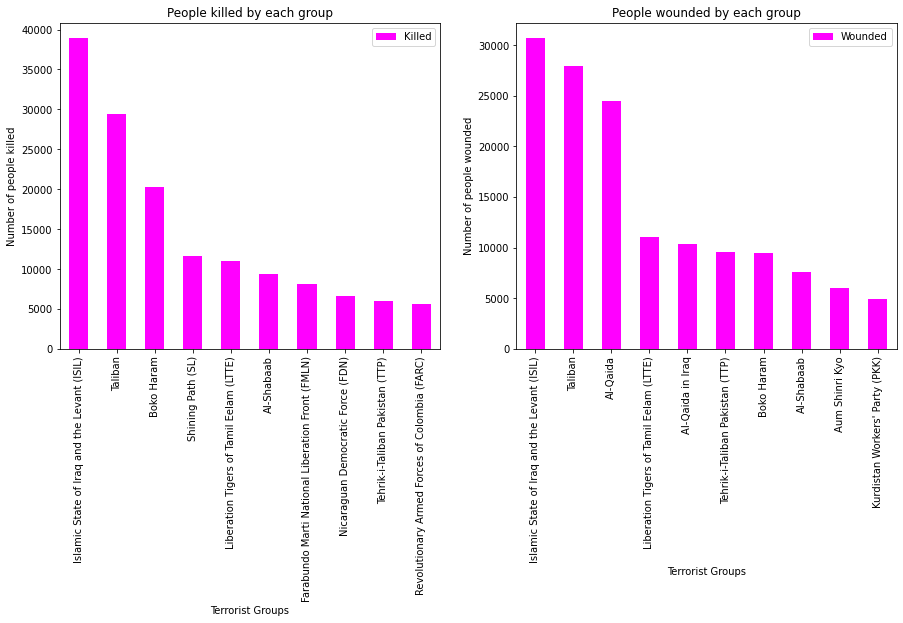

In [ ]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

#Killed
gk[:10].plot(kind="bar", color="magenta", figsize=(15,6),ax=ax0)
ax0.set_title("People killed by each group")
ax0.set_xlabel("Terrorist Groups")
ax0.set_ylabel("Number of people killed")

#Wounded
gw[:10].plot(kind="bar", color="magenta", figsize=(15,6),ax=ax1)
ax1.set_title("People wounded by each group")
ax1.set_xlabel("Terrorist Groups")
ax1.set_ylabel("Number of people wounded")

plt.show()

# 6.Attack Type wise Attacks

1.Number of Attacks by each Attacktype

In [ ]:
at=df["Attack Type"].value_counts()
at

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: Attack Type, dtype: int64

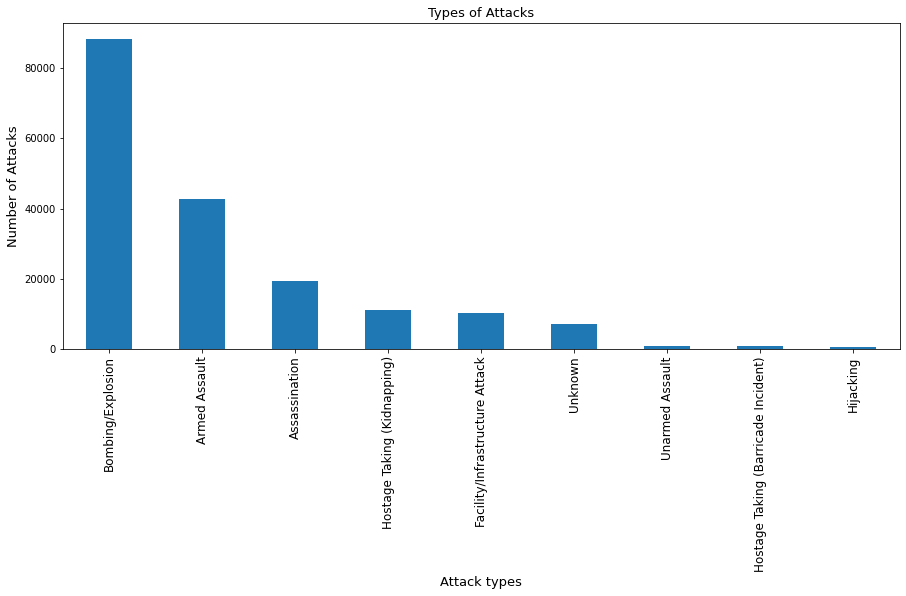

In [ ]:
at.plot(kind="bar", figsize=(15,6))
plt.title("Types of Attacks", fontsize=13)
plt.xlabel("Attack types", fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Attacks", fontsize=13)
plt.show()

2.Total Casualties (Killed+Wounded) by each Attack type

In [ ]:
ac=df[["Attack Type", "Casualty"]].groupby("Attack Type").sum().sort_values(by="Casualty", ascending=False).drop("Unknown")
ac

,Casualty
Attack Type,
Bombing/Explosion,530007.0
Armed Assault,237663.0
Assassination,38807.0
Hostage Taking (Kidnapping),30677.0
Hijacking,20719.0
Unarmed Assault,14907.0
Hostage Taking (Barricade Incident),8444.0
Facility/Infrastructure Attack,7407.0


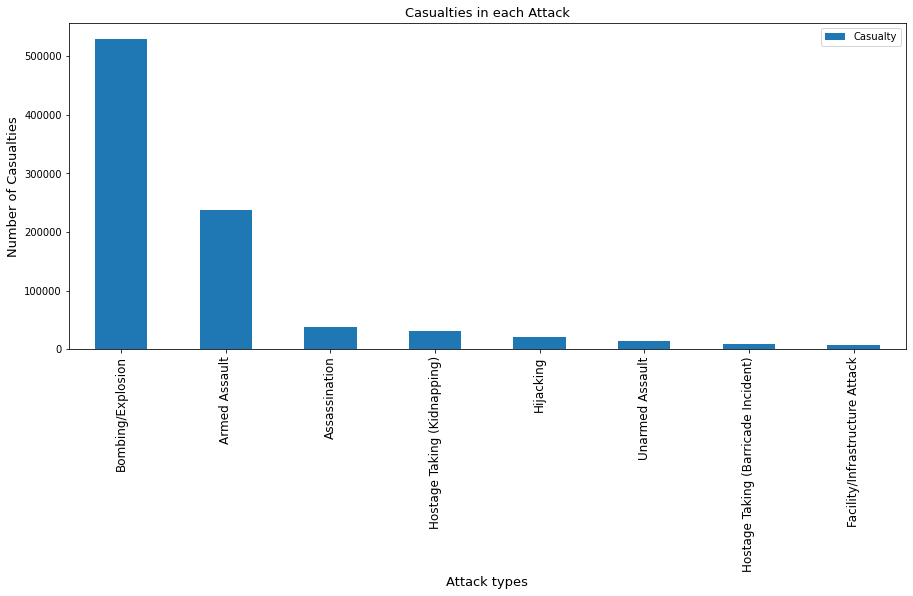

In [ ]:
ac.plot(kind="bar", figsize=(15,6))
plt.title("Casualties in each Attack", fontsize=13)
plt.xlabel("Attack types", fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Casualties", fontsize=13)
plt.show()

3.Killed by each Attack type

In [ ]:
ak=df[["Attack Type", "Killed"]].groupby("Attack Type").sum().sort_values(by="Killed", ascending=False)
ak

,Killed
Attack Type,
Armed Assault,160297.0
Bombing/Explosion,157321.0
Unknown,32381.0
Assassination,24920.0
Hostage Taking (Kidnapping),24231.0
Hostage Taking (Barricade Incident),4478.0
Hijacking,3718.0
Facility/Infrastructure Attack,3642.0
Unarmed Assault,880.0


In [ ]:
aw=df[["Attack Type", "Wounded"]].groupby("Attack Type").sum().sort_values(by="Wounded", ascending=False)
aw

,Wounded
Attack Type,
Bombing/Explosion,372686.0
Armed Assault,77366.0
Hijacking,17001.0
Unknown,14725.0
Unarmed Assault,14027.0
Assassination,13887.0
Hostage Taking (Kidnapping),6446.0
Hostage Taking (Barricade Incident),3966.0
Facility/Infrastructure Attack,3765.0


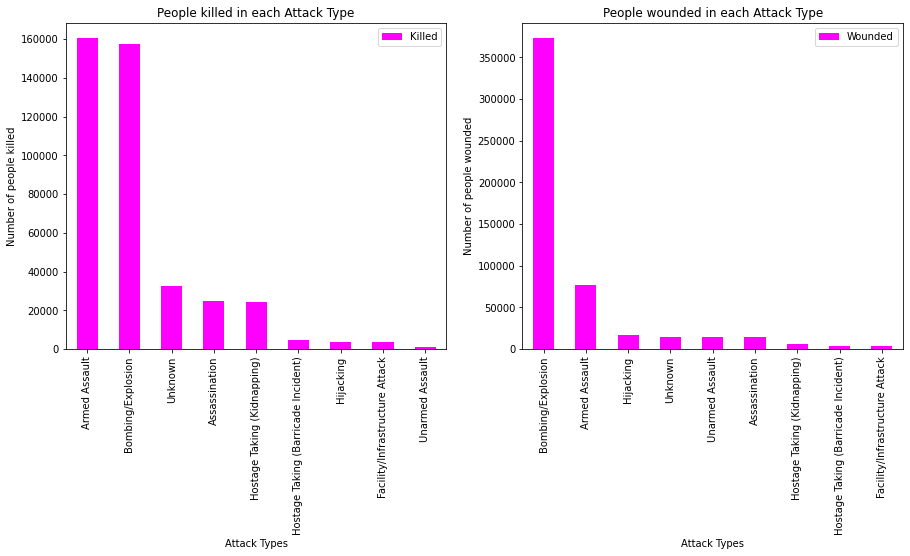

In [ ]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

#Killed
ak.plot(kind="bar", color="magenta", figsize=(15,6),ax=ax0)
ax0.set_title("People killed in each Attack Type")
ax0.set_xlabel("Attack Types")
ax0.set_ylabel("Number of people killed")

#Wounded
aw.plot(kind="bar", color="magenta", figsize=(15,6),ax=ax1)
ax1.set_title("People wounded in each Attack Type")
ax1.set_xlabel("Attack Types")
ax1.set_ylabel("Number of people wounded")

plt.show()

# 7.Target Type wise Attacks

1.Number of Attacks over each target type

In [ ]:
ta=df["Target Type"].value_counts()
ta

Private Citizens & Property       43511
Military                          27984
Police                            24506
Government (General)              21283
Business                          20669
Transportation                     6799
Utilities                          6023
Unknown                            5898
Religious Figures/Institutions     4440
Educational Institution            4322
Government (Diplomatic)            3573
Terrorists/Non-State Militia       3039
Journalists & Media                2948
Violent Political Party            1866
Airports & Aircraft                1343
Telecommunication                  1009
NGO                                 970
Tourists                            440
Maritime                            351
Food or Water Supply                317
Abortion Related                    263
Other                               137
Name: Target Type, dtype: int64

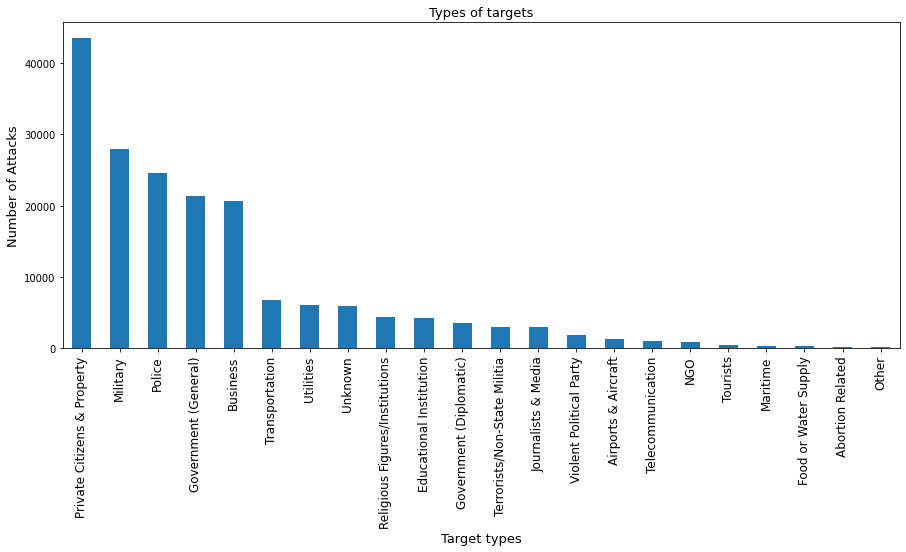

In [ ]:
ta.plot(kind="bar", figsize=(15,6))
plt.title("Types of targets", fontsize=13)
plt.xlabel("Target types", fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Attacks", fontsize=13)
plt.show()

In [ ]:
tc=df[["Target Type", "Casualty"]].groupby("Target Type").sum().sort_values(by="Casualty", ascending=False).drop("Unknown")
tc

,Casualty
Target Type,
Private Citizens & Property,319176.0
Military,177085.0
Police,118407.0
Business,78018.0
Government (General),67255.0
Transportation,54595.0
Religious Figures/Institutions,37890.0
Terrorists/Non-State Militia,17311.0
Educational Institution,13972.0


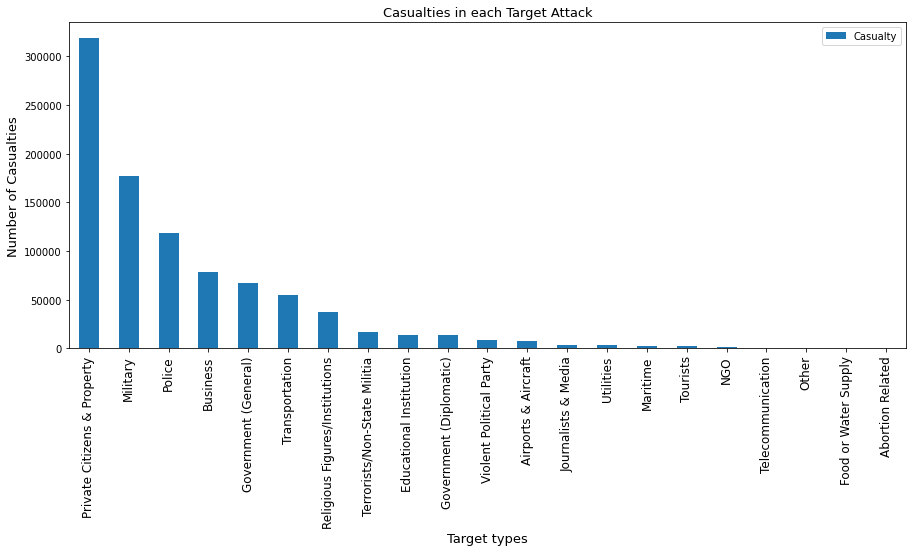

In [ ]:
tc.plot(kind="bar", figsize=(15,6))
plt.title("Casualties in each Target Attack", fontsize=13)
plt.xlabel("Target types", fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Casualties", fontsize=13)
plt.show()

In [ ]:
tk=df[["Target Type", "Killed"]].groupby("Target Type").sum().sort_values(by="Killed", ascending=False)
tk

,Killed
Target Type,
Private Citizens & Property,140504.0
Military,106047.0
Police,53704.0
Government (General),26071.0
Business,23487.0
Transportation,13916.0
Religious Figures/Institutions,13413.0
Terrorists/Non-State Militia,9088.0
Unknown,4329.0


In [ ]:
tw=df[["Target Type", "Wounded"]].groupby("Target Type").sum().sort_values(by="Wounded", ascending=False)
tw

,Wounded
Target Type,
Private Citizens & Property,178672.0
Military,71038.0
Police,64703.0
Business,54531.0
Government (General),41184.0
Transportation,40679.0
Religious Figures/Institutions,24477.0
Government (Diplomatic),10359.0
Educational Institution,10227.0


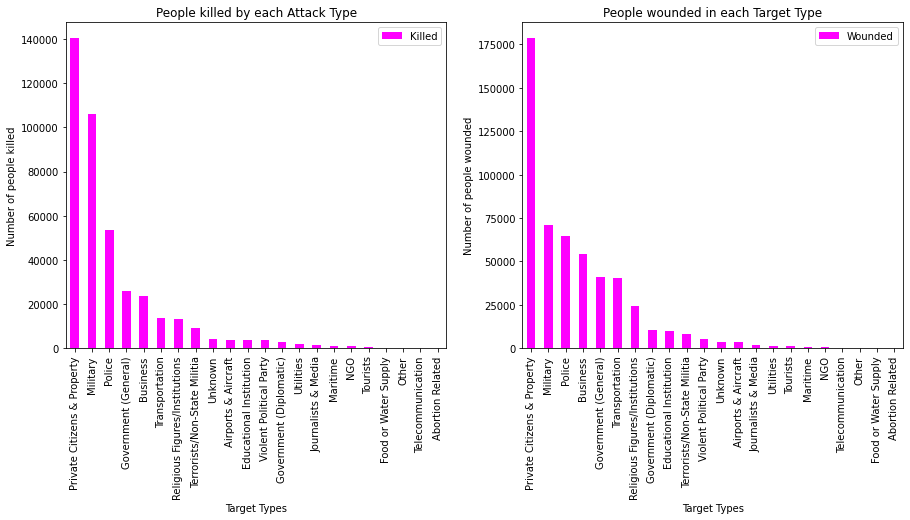

In [ ]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

#Killed
tk.plot(kind="bar", color="magenta", figsize=(15,6),ax=ax0)
ax0.set_title("People killed by each Attack Type")
ax0.set_xlabel("Target Types")
ax0.set_ylabel("Number of people killed")

#Wounded
tw.plot(kind="bar", color="magenta", figsize=(15,6),ax=ax1)
ax1.set_title("People wounded in each Target Type")
ax1.set_xlabel("Target Types")
ax1.set_ylabel("Number of people wounded")

plt.show()

# 8.Group+Country wise - Top 10

1.Sorting by number of Attacks

In [ ]:
gca=df[["Group Name", "Country"]].value_counts().drop("Unknown")
gca.head(10)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


Group Name                                        Country       
Taliban                                           Afghanistan       7423
Islamic State of Iraq and the Levant (ISIL)       Iraq              4797
Shining Path (SL)                                 Peru              4541
Farabundo Marti National Liberation Front (FMLN)  El Salvador       3330
Al-Shabaab                                        Somalia           2867
New People's Army (NPA)                           Philippines       2770
Irish Republican Army (IRA)                       United Kingdom    2575
Revolutionary Armed Forces of Colombia (FARC)     Colombia          2468
Kurdistan Workers' Party (PKK)                    Turkey            2109
Boko Haram                                        Nigeria           2087
dtype: int64

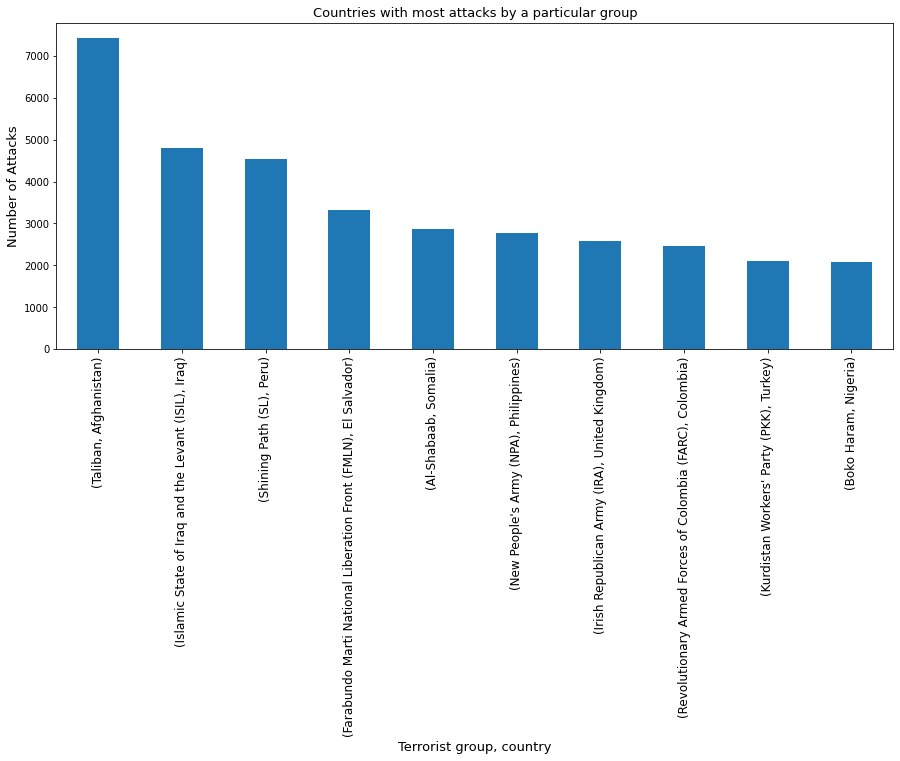

In [ ]:
gca.head(10).plot(kind="bar", figsize=(15,6))
plt.title("Countries with most attacks by a particular group", fontsize=13)
plt.xlabel("Terrorist group, country", fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Attacks", fontsize=13)
plt.show()

2.Sorting by number of Casualties

In [ ]:
gcc=df[["Group Name", "Country", "Casualty"]].groupby(["Group Name", "Country"], axis=0).sum().sort_values(by="Casualty", ascending=False).drop("Unknown")
gcc

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


,,Casualty
Group Name,Country,
Taliban,Afghanistan,57140.0
Islamic State of Iraq and the Levant (ISIL),Iraq,54755.0
Boko Haram,Nigeria,24588.0
Liberation Tigers of Tamil Eelam (LTTE),Sri Lanka,21919.0
Al-Qaida,United States,19494.0
...,...,...
People's Information Group,Nicaragua,0.0
Drug-Related Terrorists,Haiti,0.0
People's Liberation Army (United States),United States,0.0


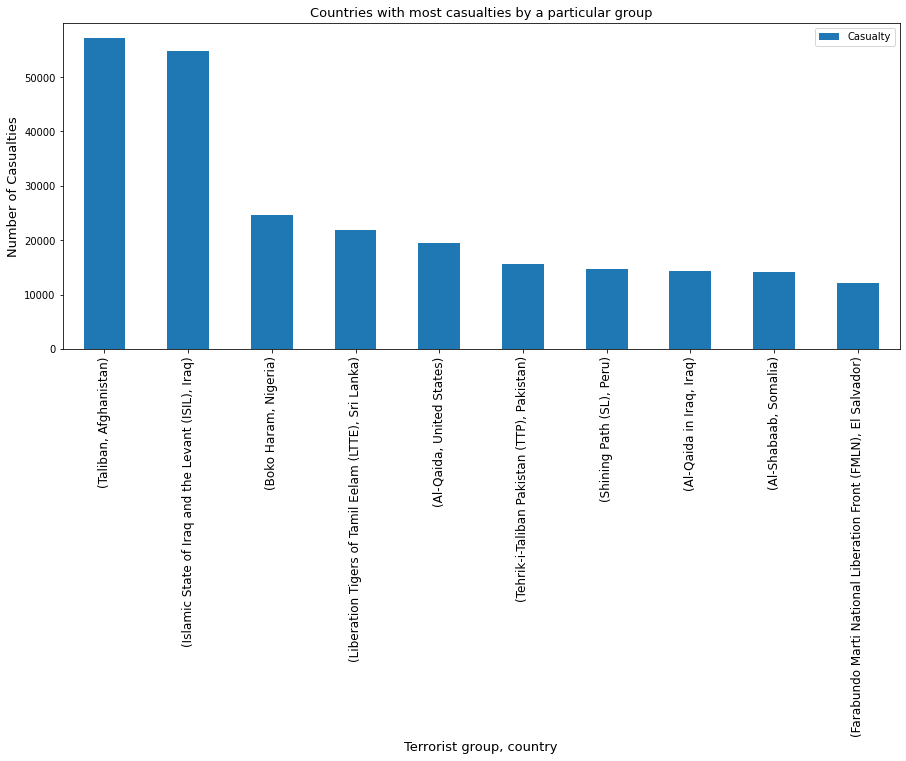

In [ ]:
gcc.head(10).plot(kind="bar", figsize=(15,6))
plt.title("Countries with most casualties by a particular group", fontsize=13)
plt.xlabel("Terrorist group, country", fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Casualties", fontsize=13)
plt.show()

In [ ]:
gck=df[["Group Name", "Country", "Killed"]].groupby(["Group Name", "Country"], axis=0).sum().sort_values(by="Killed", ascending=False).drop("Unknown")
gck

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


,,Killed
Group Name,Country,
Islamic State of Iraq and the Levant (ISIL),Iraq,31058.0
Taliban,Afghanistan,29269.0
Boko Haram,Nigeria,16917.0
Shining Path (SL),Peru,11595.0
Liberation Tigers of Tamil Eelam (LTTE),Sri Lanka,10928.0
...,...,...
Civil War Veterans,Liberia,0.0
Mustafa Aktas Fighting Unit,West Germany (FRG),0.0
Mustafa al-Hujairi Group,Lebanon,0.0


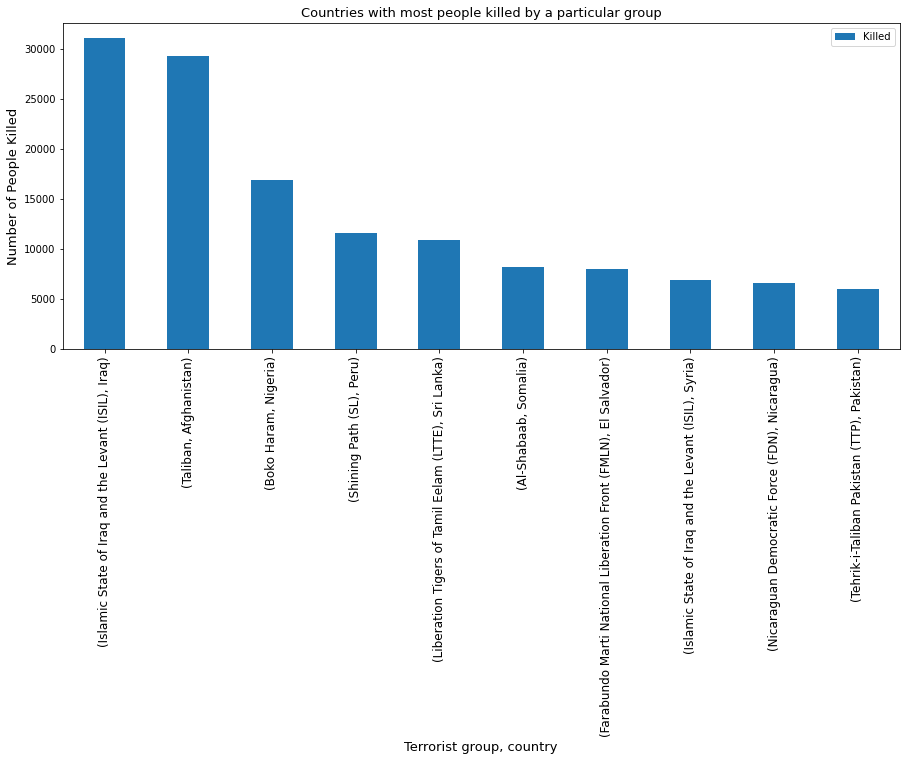

In [ ]:
gck.head(10).plot(kind="bar", figsize=(15,6))
plt.title("Countries with most people killed by a particular group", fontsize=13)
plt.xlabel("Terrorist group, country", fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of People Killed", fontsize=13)
plt.show()

In [ ]:
gcw=df[["Group Name", "Country", "Wounded"]].groupby(["Group Name", "Country"], axis=0).sum().sort_values(by="Wounded", ascending=False).drop("Unknown")
gcw

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


,,Wounded
Group Name,Country,
Taliban,Afghanistan,27871.0
Islamic State of Iraq and the Levant (ISIL),Iraq,23697.0
Al-Qaida,United States,16493.0
Liberation Tigers of Tamil Eelam (LTTE),Sri Lanka,10991.0
Al-Qaida in Iraq,Iraq,10075.0
...,...,...
Irrintzi,France,0.0
Isatabu Freedom Movement (IFM),Solomon Islands,0.0
Islam Liberation Front,Algeria,0.0


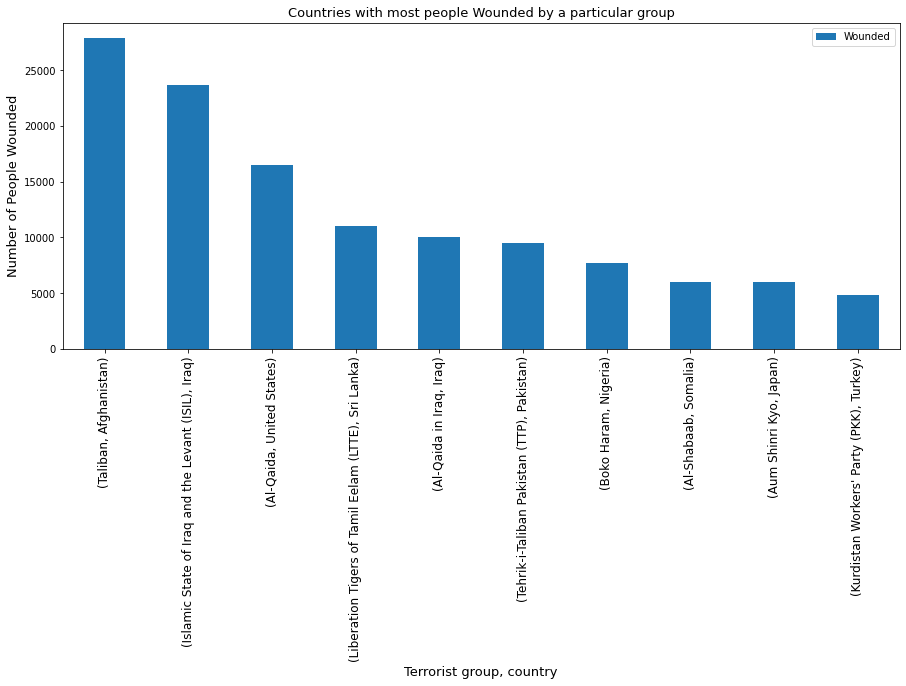

In [ ]:
gcw.head(10).plot(kind="bar", figsize=(15,6))
plt.title("Countries with most people Wounded by a particular group", fontsize=13)
plt.xlabel("Terrorist group, country", fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of People Wounded", fontsize=13)
plt.show()

# 9.Humanity Affected (World-wide) by Terrorist Attacks from 1970 to 2017

1.Total casualties (Killed+Wounded) due to terrorist attacks

In [ ]:
casualty=df.loc[:,"Casualty"].sum()
print("Total number of casualties due to terrorist attacks from 1970 to 2017 across the world: \n", casualty)

Total number of casualties due to terrorist attacks from 1970 to 2017 across the world: 
 935737.0


2.Killed due to Terrorist Attacks 

In [ ]:
kill=df.loc[:,"Killed"].sum()
print("Total number of people killed due to terrorist attacks from 1970 to 2017 across the world: \n", kill)

Total number of people killed due to terrorist attacks from 1970 to 2017 across the world: 
 411868.0


3.Wounded due to terrorist attacks

In [ ]:
wound=df.loc[:,"Wounded"].sum()
print("Total number of people wounded due to terrorist attacks from 1970 to 2017 across the world: \n", wound)

Total number of people wounded due to terrorist attacks from 1970 to 2017 across the world: 
 523869.0
